In [122]:
# this notebook, we will train a MLP(Multi-Layer Perceptron) to reconize hand-written digit using Pytorch.
# import need library
import torch
import torchvision
import numpy as np
import pandas as pd
# check torch version
torch.__version__

'0.4.1'

In [123]:
# load the train dataset
dataset = pd.read_csv(r"input/test.csv",dtype = np.float32)
print(dataset.shape)
dataset.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [124]:
test_features = dataset.values
test_features = test_features/255 # normalization
#print(test_features[0])
testFeatures = torch.from_numpy(test_features)
#testFeatures[0]

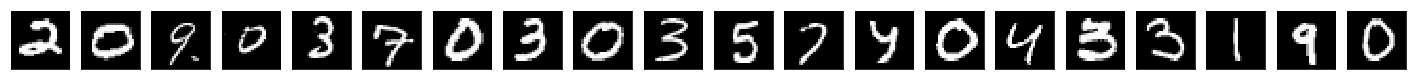

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
images = testFeatures.numpy()
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20, idx+1, xticks=[], yticks=[])
    ax.imshow(images[idx].reshape(28,28), cmap='gray')

In [126]:
import torch.nn as nn
import torch.nn.functional as F

# define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # number of hidden nodes in each layer (512)
        hidden_1 = 512
        hidden_2 = 512
        # linear layer (784 -> hidden_1)
        self.fc1 = nn.Linear(28 * 28, hidden_1)
        # linear layer (n_hidden -> hidden_2)
        self.fc2 = nn.Linear(hidden_1, hidden_2)
        # linear layer (n_hidden -> 10)
        self.fc3 = nn.Linear(hidden_2, 10)
        # dropout layer (p=0.2)
        # dropout prevents overfitting of data
        self.dropout = nn.Dropout(0.2)

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add hidden layer, with relu activation function
        x = F.relu(self.fc2(x))
        # add dropout layer
        x = self.dropout(x)
        # add output layer
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2)
)


In [127]:
model.load_state_dict(torch.load('model.pt'))

In [128]:
result = np.zeros(len(testFeatures))
# print(len(result))
model.eval() # prep model for evaluation
for idx, data in enumerate(testFeatures):
    output = model(data)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    result[idx] = pred.numpy()[0]

# # write result into file "submission.csv"
# print(np.dstack((np.arange(1, result.size+1),result))[0])
np.savetxt("input/submission.csv", np.dstack((np.arange(1, result.size+1),result))[0],
           "%d,%d", header="ImageId,Label", comments="")
